# Laboratory 07 Exercises

## 1\. Kernel Density Estimate (done)

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of length **N** (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation **$\sigma$**.
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and the std as a parameter that can be tuned. The std default value should be:
$$ \alpha * \sigma * N ^{-\frac{1}{5.}} $$

The KDE is a procedure used to smooth the histogram. The parameter $\alpha$ tunes the bandwidth of the individual gaussians:
- if choosen too small, data artifacts will remain visible (the underlying distribution is under-smoothed)
- if choosen too large, the real pdf will be obscured.

Start from a value of $\alpha = 1.06$ and then tune.


you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


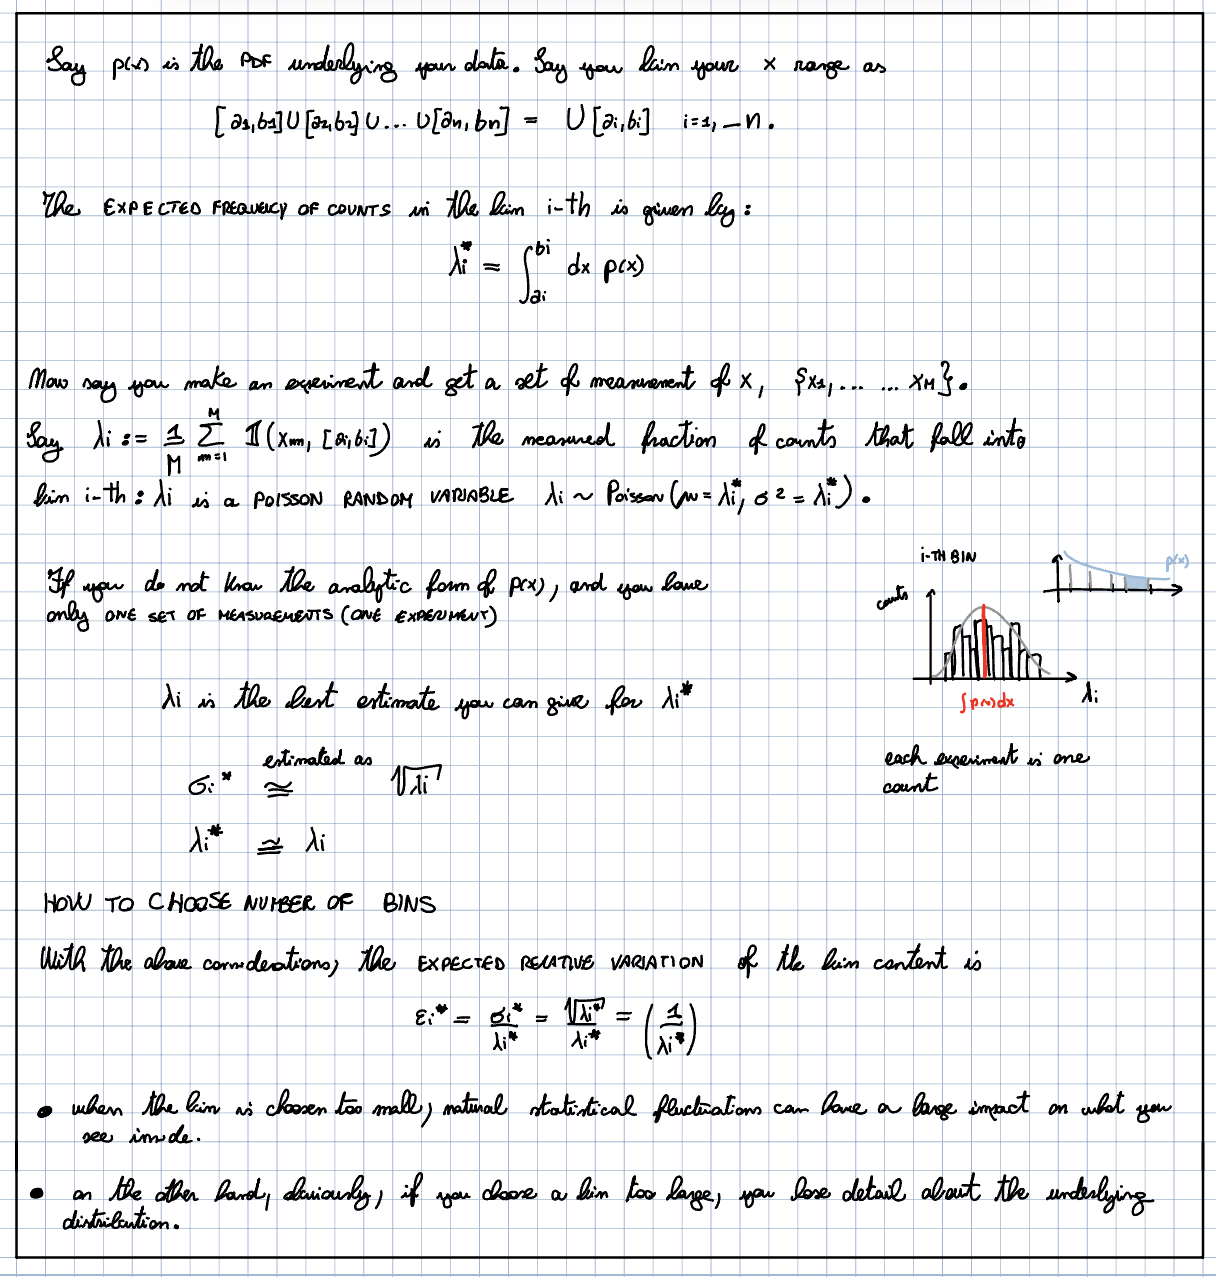

In [36]:
from IPython.display import Image
Image('note.jpeg', width= 2*200, height= 2*400)

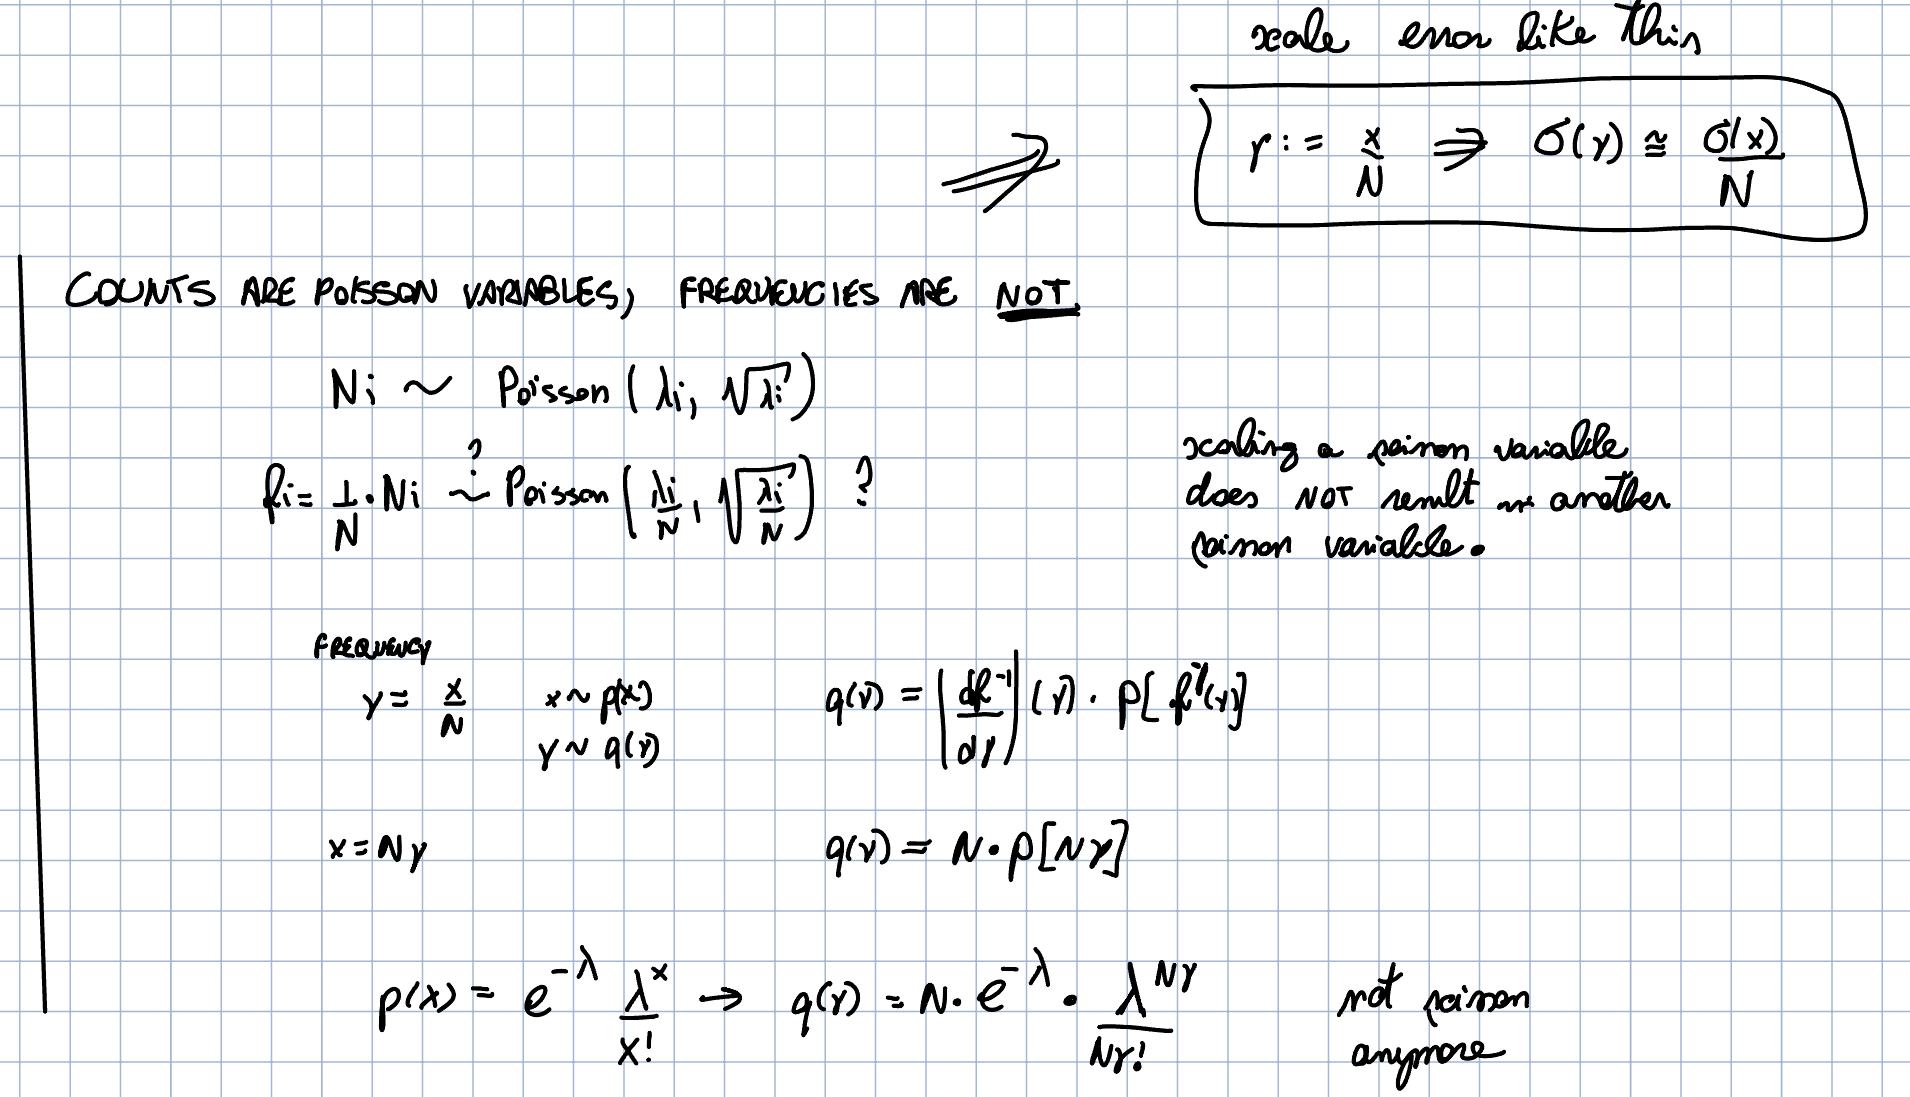

In [37]:
Image('note_bis.jpeg', width= 2*200, height= 2*400)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

# Data Generation
N = 100
np.random.seed(19680801)
x = np.random.normal(loc= 0., scale= 1., size = N)

Text(0, 0.5, 'frequency')

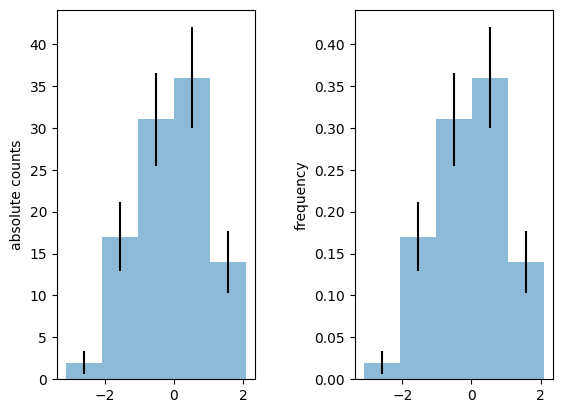

In [39]:
# Data plotting
counts, bins = np.histogram(x, bins= 5)
estimated_relative_variations = np.sqrt(counts)/counts
estimated_relative_variations # check if reasonable, otherwise change bin numbers

fig, axs = plt.subplots(nrows= 1, ncols = 2)

axs[0].bar(x = bins[:-1], height = counts, align = 'edge',
         width= (bins[1]- bins[0]), yerr = np.sqrt(counts), alpha = 0.5)
axs[0].set_ylabel("absolute counts")

plt.subplots_adjust(wspace = 0.5)

axs[1].bar(x = bins[:-1], height = counts/N, align = 'edge',
         width= (bins[1]- bins[0]), yerr = np.sqrt(counts)/N, alpha = 0.5)
axs[1].set_ylabel("frequency")

In [48]:
# KDE

alpha = 1.06
kernel_std = alpha * np.std(x) * (x.size) ** (-1./5.)
# Plot the individual gaussians
n_points = 1000 # large enough to make a smooth gaussian curve
x_axis_smooth = np.linspace(start= np.min(x), stop = np.max(x), num = n_points)

gaussians = np.zeros(shape = (N, n_points)) # each row contains the entire gaussian of one data point
for i, x_point in enumerate(x):
    gaussians[i, :] = [stats.norm.pdf(z, loc= x_point, scale = kernel_std) for z in x_axis_smooth]
gaussians_sum = np.sum(gaussians, axis= 0) #fix col and sum over rows. results in the sum of gaussians

# Renormalization
histogram_counts_integral = N * (bins[1]-bins[0])
gaussian_integral = integrate.simpson(y = gaussians_sum, x = x_axis_smooth)
gaussians_sum *= (histogram_counts_integral/ gaussian_integral) #renormalization
gaussians *= (histogram_counts_integral/ gaussian_integral)

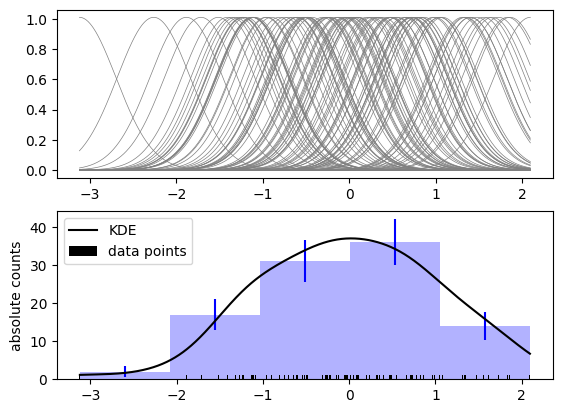

In [54]:
# Plotting

fig, axs = plt.subplots(nrows= 2, ncols = 1)

# All gaussians
for i, _ in enumerate(x):
    axs[0].plot(x_axis_smooth, gaussians[i, :], color = 'grey', linewidth = 0.5)

# Data histogram and rug plot
axs[1].bar(x = bins[:-1], height = counts, align = 'edge',
         width= (bins[1]- bins[0]), yerr = np.sqrt(counts), 
         alpha = 0.3, color = 'blue', ecolor = 'blue')
axs[1].bar(x = x, height= 1, width = 0.01, color = 'black', label = 'data points') #rug plot
axs[1].set_ylabel("absolute counts")
axs[1].plot(x_axis_smooth, gaussians_sum, color = 'black', label = 'KDE')

axs[1].legend(loc = "best")

## 2\. Color-coded scatter plot (done)

Produce a scatter plot out of a dataset with two categories (== variables)

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   139  100   139    0     0    554      0 --:--:-- --:--:-- --:--:--   553
100    17  100    17    0     0     17      0  0:00:01 --:--:--  0:00:01    17
100 43828  100 43828    0     0  28486      0  0:00:01  0:00:01 --:--:-- 84610


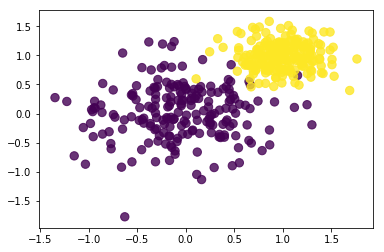

In [3]:
! curl -O -L https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

Text(0, 0.5, 'y')

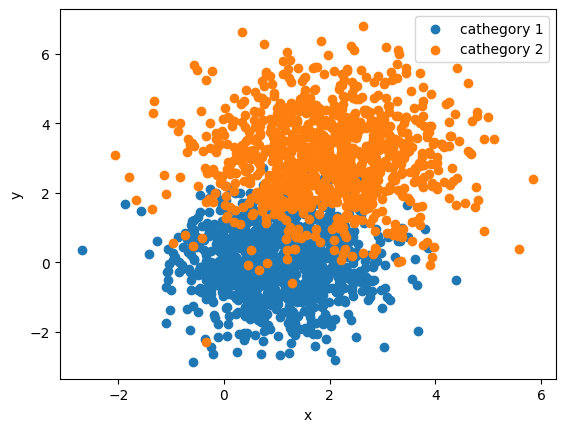

In [27]:
import numpy.random as npr
import matplotlib.pyplot as plt
npr.seed(134583)
mean_1 = [1,0]
cov_1 = [[1, 0], [0, 1]]
data_1 = npr.multivariate_normal(mean = mean_1, cov = cov_1, size = 1000)
mean_2 = [2,3]
cov_2 = [[1.5, 0],[0, 1.5]]
data_2 = npr.multivariate_normal(mean = mean_2, cov = cov_2, size = 1000)
plt.scatter(x = data_1[:, 0], y = data_1[:, 1], label = 'cathegory 1')
plt.scatter(x = data_2[:, 0], y = data_2[:, 1], label = "cathegory 2")
plt.legend(loc= "best")
plt.xlabel("x")
plt.ylabel("y")


## 3\. Profile plot (done)

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
- Request 1:
  * Inspect the dataset, you'll find two variables (features)
  * Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
  * perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
- Request 2:
  * plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
- Request 3:

  Plot the binned mean +/- std of "residuals" versus "distances". To achieve this:
  * Fill 3 numpy arrays
    * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
    * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
    * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
  * Plot this on top of the `sns.joinplot()` scatter and profile plot

In [29]:
! curl -O -L https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   125  100   125    0     0    476      0 --:--:-- --:--:-- --:--:--   475
100    17  100    17    0     0     22      0 --:--:-- --:--:-- --:--:--    22
100   470    0   470    0     0    370      0 --:--:--  0:00:01 --:--:--     0
100  246k  100  246k    0     0   147k      0  0:00:01  0:00:01 --:--:--  147k


In [47]:
import numpy as np
import pandas as pd
from scipy import stats
data = np.load(file= "residuals_261.npy", allow_pickle= True)
#data.item()
#type(data.item()) # data.item() is a dict, therefore can be directly passed to the pandas constructor
df = pd.DataFrame(data.item())
df = df[np.abs(df['residuals']) <= 2].reset_index(drop= True)
df.head()


,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-0.042857,3.3
3,0.128571,5.3
4,0.085714,15.0


In [61]:
x, y =  df['distances'], df['residuals']
result = stats.linregress(x, y)
print(f"slope: {result.slope} +- {result.stderr}")
print(f"intercept: {result.intercept} +- {result.intercept_stderr}")
print(f"pvalue: {result.pvalue}")

slope: 0.0032647624619523623 +- 0.0007333031643284609
intercept: -0.15455660762866388 +- 0.008465740956629591
pvalue: 8.590047342562451e-06


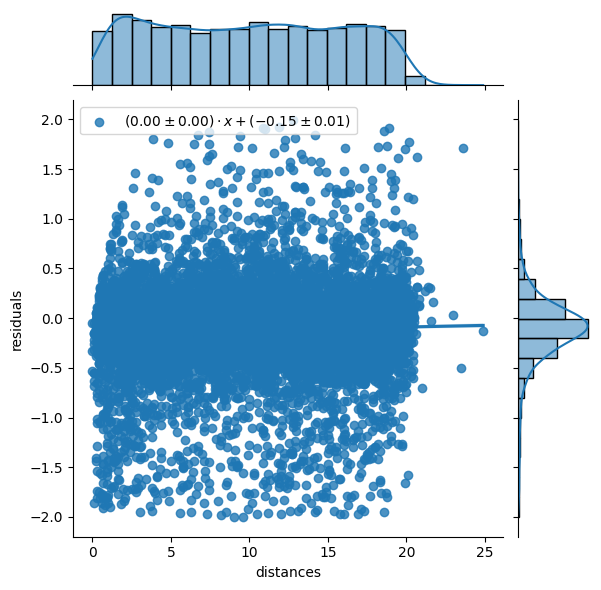

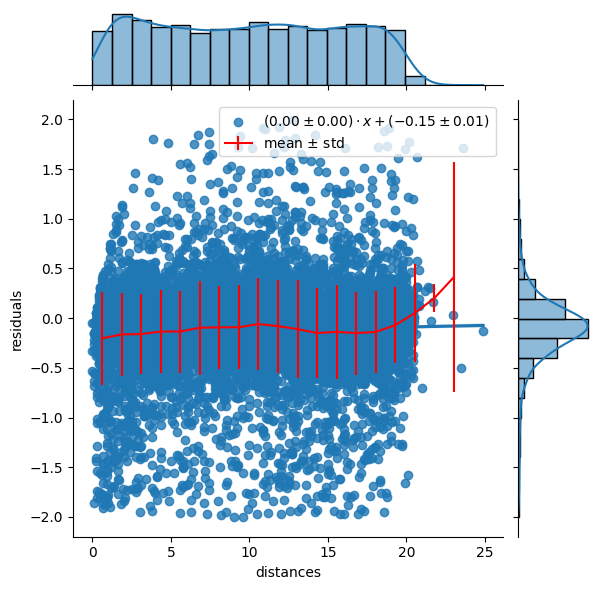

In [75]:
nbins = 20
delta = ( np.max(x) - np.min(x) ) / nbins

#nbins_for_seaborn =int(( np.max(x)- np.min(x) ) / delta)

import seaborn as sns
sns.jointplot(x ='distances', y = 'residuals', data = df, kind= 'reg', label = rf"$({result.slope:.2f}\pm{result.stderr:.2f})\cdot x + ({result.intercept:.2f} \pm {result.intercept_stderr:.2f})$", 
              marginal_kws= {"bins": nbins}) #marginal_kws, passed as a dict, contains the additional info for the marginal plots. I set the bin number so that the plot I do next matches this number of bins


x_centers = [(np.min(x) + delta/2) + n * delta for n in range(nbins)]
mean_array = []
std_array = []
for center in x_centers:
    df_temp = df[ ( df['distances'] <= (center + delta/2) ) & ( df['distances'] >= (center - delta/2) ) ]
    mean_array.append( df_temp['residuals'].mean() )
    std_array.append( df_temp['residuals'].std() )

plt.errorbar(x_centers, mean_array, yerr= std_array, color = 'red', label = r"mean $\pm$ std")

plt.legend(loc = "best")

The problem is that the bin centers of seaborn do not coincide with those of the manual plot, but who cares